In [50]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'errorbar.capsize': 2})
import scipy as sp
from scipy import odr
from texttable import *
from latextable import *
from uncertainties import unumpy, ufloat

import pint # module for units

In [51]:
# plt.style.use('seaborn-v0_8-paper')
# plt.style.available

import scienceplots
plt.style.use(['science', 'notebook'])

In [52]:
from cycler import cycler
custom_marker_cycler = (cycler(marker=['o', 'v', 's', 'd']))

In [53]:
# Define function to plot polarization versus intensity for each beaker size

def polarization_v_intensity_by_beaker_size(no_beaker_polarization, small_beaker_polarization, medium_beaker_polarization,
                                            large_beaker_polarization, no_beaker_intensity, small_beaker_intensity, 
                                            medium_beaker_intensity, large_beaker_intensity, polarization_error, 
                                            no_beaker_intensity_error, small_beaker_intensity_error, medium_beaker_intensity_error, 
                                            large_beaker_intensity_error, title, save_name):
    fig, ax = plt.subplots()
    ax.set_prop_cycle(custom_marker_cycler)
    ax.errorbar(no_beaker_polarization, no_beaker_intensity, xerr=polarization_error, yerr=no_beaker_intensity_error, markersize=8, c='k', ls='none', label='No Beaker')
    ax.errorbar(small_beaker_polarization, small_beaker_intensity, xerr=polarization_error, yerr=small_beaker_intensity_error, markersize=8, c='k', ls='none', label='Small Beaker')
    ax.errorbar(medium_beaker_polarization, medium_beaker_intensity, xerr=polarization_error, yerr=medium_beaker_intensity_error, markersize=8, c='k', ls='none', label='Medium Beaker')
    ax.errorbar(large_beaker_polarization, large_beaker_intensity, xerr=polarization_error, yerr=large_beaker_intensity_error, markersize=8, c='k', ls='none', label='Large Beaker')
    ax.set_xlabel('Polarization (degrees)')
    ax.set_ylabel('Intensity (arb. units)')
    ax.set_title(title)
    ax.grid(False)
    ax.legend(loc='best', fontsize='large')
    plt.savefig('../figures/' + save_name + '.png')
    plt.show()

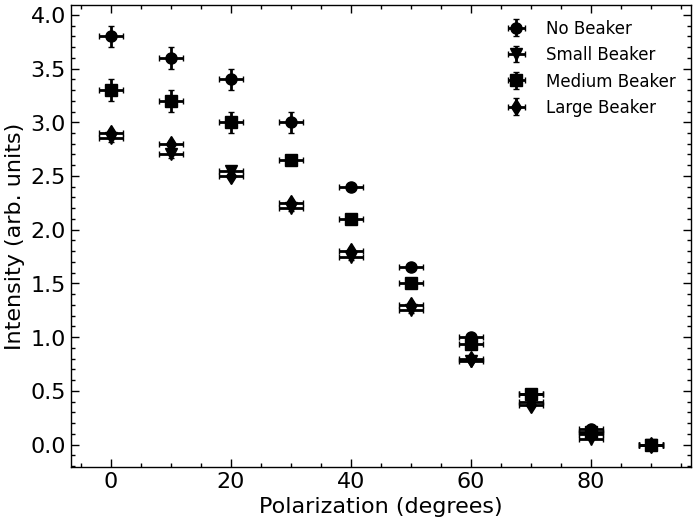

\begin{table}[H]
	\begin{center}
		\begin{tabular}{ccc}
			\toprule
			Polarization (degrees) & Intensity (arb. units) & Intensity Error (arb. units) \\
			\midrule
			90 & 0.00 & 0.01 \\
			80 & 0.14 & 0.01 \\
			70 & 0.47 & 0.01 \\
			60 & 1.00 & 0.03 \\
			50 & 1.65 & 0.03 \\
			40 & 2.40 & 0.03 \\
			30 & 3.00 & 0.10 \\
			20 & 3.40 & 0.10 \\
			10 & 3.60 & 0.10 \\
			0 & 3.80 & 0.10 \\
			90 & 0.00 & 0.01 \\
			80 & 0.05 & 0.01 \\
			70 & 0.40 & 0.01 \\
			60 & 0.78 & 0.01 \\
			50 & 1.25 & 0.03 \\
			40 & 1.75 & 0.03 \\
			30 & 2.20 & 0.03 \\
			20 & 2.55 & 0.03 \\
			10 & 2.70 & 0.03 \\
			0 & 2.85 & 0.03 \\
			90 & 0.00 & 0.01 \\
			80 & 0.12 & 0.01 \\
			70 & 0.47 & 0.01 \\
			60 & 0.94 & 0.01 \\
			50 & 1.50 & 0.03 \\
			40 & 2.10 & 0.03 \\
			30 & 2.65 & 0.03 \\
			20 & 3.00 & 0.10 \\
			10 & 3.20 & 0.10 \\
			0 & 3.30 & 0.10 \\
			90 & 0.00 & 0.01 \\
			80 & 0.10 & 0.01 \\
			70 & 0.37 & 0.01 \\
			60 & 0.80 & 0.01 \\
			50 & 1.30 & 0.03 \\
			40 & 1.80 & 0.03 \\
			30 & 2.

In [54]:
# No beaker (control)
no_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
no_beaker_intensity = np.array([0.0, 0.14, 0.47, 1.00, 1.65, 2.40, 3.0, 3.4, 3.6, 3.8])

# Small beaker without water
small_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_intensity = np.array([0.0, 0.05, 0.40, 0.78, 1.25, 1.75, 2.20, 2.55, 2.70, 2.85])

# Medium beaker without water
medium_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_intensity = np.array([0.0, 0.12, 0.47, 0.94, 1.50, 2.10, 2.65, 3.0, 3.2, 3.3])

# Large beaker without water
large_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_intensity = np.array([0.0, 0.10, 0.37, 0.80, 1.30, 1.80, 2.25, 2.50, 2.80, 2.90])

# Polarizing lens error (uniform for all sets of data points)
polarization_error_degrees = np.full((len(no_beaker_polarization), ), 2)
# Intensity error for no beaker (different for each set of data points)
no_beaker_intensity_error = np.array([0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.1, 0.1, 0.1, 0.1])
small_beaker_intensity_error = np.array([0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03])
medium_beaker_intensity_error = np.array([0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.1, 0.1, 0.1])
large_beaker_intensity_error = np.array([0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03])

# Plot the data
polarization_v_intensity_by_beaker_size(no_beaker_polarization, small_beaker_polarization, medium_beaker_polarization, large_beaker_polarization, 
                                        no_beaker_intensity, small_beaker_intensity, medium_beaker_intensity, large_beaker_intensity, 
                                        polarization_error_degrees, no_beaker_intensity_error, small_beaker_intensity_error, 
                                        medium_beaker_intensity_error, large_beaker_intensity_error, None, 'no_water')

# Try to turn data into a latex table

table_1 = Texttable()
table_1.set_deco(Texttable.HEADER)
table_1.set_cols_dtype(['t', 'f', 'f'])
table_1.set_cols_align(["c", "c", "c"])
table_1.set_precision(2)
table_1.add_rows([['Polarization (degrees)', 'Intensity (arb. units)', 'Intensity Error (arb. units)'],
                    [90, 0.0, 0.01],
                    [80, 0.14, 0.01],
                    [70, 0.47, 0.01],
                    [60, 1.00, 0.03],
                    [50, 1.65, 0.03],
                    [40, 2.40, 0.03],
                    [30, 3.0, 0.1],
                    [20, 3.4, 0.1],
                    [10, 3.6, 0.1],
                    [0, 3.8, 0.1],
                    [90, 0.0, 0.01],
                    [80, 0.05, 0.01],
                    [70, 0.40, 0.01],
                    [60, 0.78, 0.01],
                    [50, 1.25, 0.03],
                    [40, 1.75, 0.03],
                    [30, 2.20, 0.03],
                    [20, 2.55, 0.03],
                    [10, 2.70, 0.03],
                    [0, 2.85, 0.03],
                    [90, 0.0, 0.01],
                    [80, 0.12, 0.01],
                    [70, 0.47, 0.01],
                    [60, 0.94, 0.01],
                    [50, 1.50, 0.03],
                    [40, 2.10, 0.03],
                    [30, 2.65, 0.03],
                    [20, 3.0, 0.1],
                    [10, 3.2, 0.1],
                    [0, 3.3, 0.1],
                    [90, 0.0, 0.01],
                    [80, 0.10, 0.01],
                    [70, 0.37, 0.01],
                    [60, 0.80, 0.01],
                    [50, 1.30, 0.03],
                    [40, 1.80, 0.03],
                    [30, 2.25, 0.03],
                    [20, 2.50, 0.03],
                    [10, 2.80, 0.03],
                    [0, 2.90, 0.03]])
print(draw_latex(table_1, caption='No water', label='tab:no_water', use_booktabs=True, position='H'))


In [55]:
# Define function to plot polarization versus intensity for each beaker size without a no beaker parameter

def polarization_v_intensity_by_beaker_size(small_beaker_polarization, medium_beaker_polarization, large_beaker_polarization, 
                                            small_beaker_intensity, medium_beaker_intensity, large_beaker_intensity, polarization_error, 
                                            small_beaker_intensity_error, medium_beaker_intensity_error, large_beaker_intensity_error, title, save_name):
    fig, ax = plt.subplots()
    ax.set_prop_cycle(custom_marker_cycler)
    ax.errorbar(small_beaker_polarization, small_beaker_intensity, xerr=polarization_error, yerr=small_beaker_intensity_error, markersize='8', c='k', ls='none', label='Small Beaker')
    ax.errorbar(medium_beaker_polarization, medium_beaker_intensity, xerr=polarization_error, yerr=medium_beaker_intensity_error, markersize='8', c='k', ls='none', label='Medium Beaker')
    ax.errorbar(large_beaker_polarization, large_beaker_intensity, xerr=polarization_error, yerr=large_beaker_intensity_error, markersize='8', c='k', ls='none', label='Large Beaker')
    ax.set_xlabel('Polarization (degrees)')
    ax.set_ylabel('Intensity')
    ax.set_title(title)
    ax.legend(loc='best', fontsize='large')
    plt.savefig('../figures/' + save_name + '.png')
    plt.show()

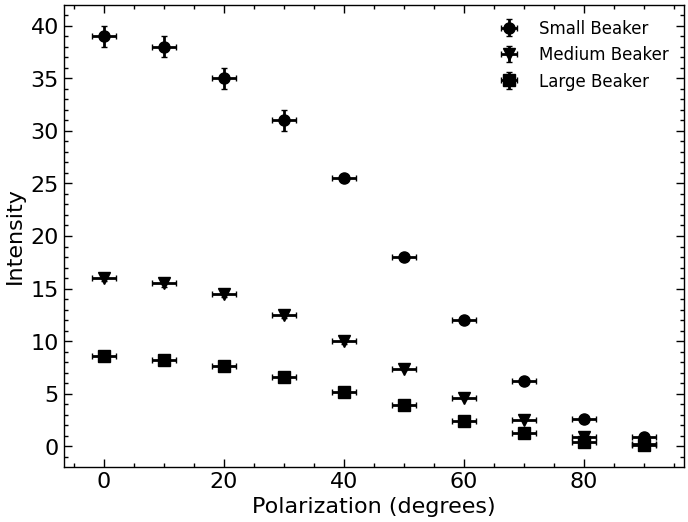

\begin{table}[H]
	\begin{center}
		\begin{tabular}{ccc}
			\toprule
			Polarization (degrees) & Intensity (arb. units) & Intensity Error (arb. units) \\
			\midrule
			90 & 0.88 & 0.01 \\
			80 & 2.65 & 0.01 \\
			70 & 6.20 & 0.03 \\
			60 & 12.00 & 0.03 \\
			50 & 18.00 & 0.10 \\
			40 & 25.50 & 0.10 \\
			30 & 31.00 & 0.10 \\
			20 & 35.00 & 0.10 \\
			10 & 38.00 & 0.10 \\
			0 & 39.00 & 0.10 \\
			90 & 0.27 & 0.01 \\
			80 & 0.88 & 0.01 \\
			70 & 2.50 & 0.03 \\
			60 & 4.60 & 0.10 \\
			50 & 7.40 & 0.10 \\
			40 & 10.00 & 0.30 \\
			30 & 12.50 & 0.30 \\
			20 & 14.50 & 0.30 \\
			10 & 15.50 & 0.30 \\
			0 & 16.00 & 0.30 \\
			90 & 0.09 & 0.01 \\
			80 & 0.43 & 0.01 \\
			70 & 1.30 & 0.03 \\
			60 & 2.40 & 0.03 \\
			50 & 3.90 & 0.10 \\
			40 & 5.20 & 0.10 \\
			30 & 6.60 & 0.10 \\
			20 & 7.60 & 0.10 \\
			10 & 8.20 & 0.10 \\
			0 & 8.60 & 0.10 \\
			\bottomrule
		\end{tabular}
	\end{center}
	\caption{Water}
	\label{tab:water}
\end{table}


In [56]:
# Small beaker with water
small_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_with_water_intensity = np.array([0.88, 2.65, 6.2, 12.0, 18.0, 25.5, 31, 35, 38, 39])

# Medium beaker with water
medium_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_with_water_intensity = np.array([0.27, 0.88, 2.50, 4.6, 7.4, 10.0, 12.5, 14.5, 15.5, 16.0])

# Large beaker with water
large_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_with_water_intensity = np.array([0.09, 0.43, 1.30, 2.40, 3.9, 5.2, 6.6, 7.6, 8.2, 8.6])

# Intensity error for water
large_beaker_with_water_intensity_error = np.array([0.01, 0.01, 0.03, 0.03, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
medium_beaker_with_water_intensity_error = np.array([0.01, 0.01, 0.03, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3])
small_beaker_with_water_intensity_error = np.array([0.01, 0.03, 0.1, 0.3, 0.3, 0.3, 1, 1, 1, 1])

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_with_water_polarization, medium_beaker_with_water_polarization,
                                        large_beaker_with_water_polarization, small_beaker_with_water_intensity,
                                        medium_beaker_with_water_intensity, large_beaker_with_water_intensity, 
                                        polarization_error_degrees, small_beaker_with_water_intensity_error, 
                                        medium_beaker_with_water_intensity_error, large_beaker_with_water_intensity_error, None, 'water')

# Turn data into a latex table

table_2 = Texttable()
table_2.set_deco(Texttable.HEADER)
table_2.set_cols_dtype(['t', 'f', 'f'])
table_2.set_cols_align(["c", "c", "c"])
table_2.set_precision(2)
table_2.add_rows([['Polarization (degrees)', 'Intensity (arb. units)', 'Intensity Error (arb. units)'],
                    [90, 0.88, 0.01],
                    [80, 2.65, 0.01],
                    [70, 6.2, 0.03],
                    [60, 12.0, 0.03],
                    [50, 18.0, 0.1],
                    [40, 25.5, 0.1],
                    [30, 31, 0.1],
                    [20, 35, 0.1],
                    [10, 38, 0.1],
                    [0, 39, 0.1],
                    [90, 0.27, 0.01],
                    [80, 0.88, 0.01],
                    [70, 2.50, 0.03],
                    [60, 4.6, 0.1],
                    [50, 7.4, 0.1],
                    [40, 10.0, 0.3],
                    [30, 12.5, 0.3],
                    [20, 14.5, 0.3],
                    [10, 15.5, 0.3],
                    [0, 16.0, 0.3],
                    [90, 0.09, 0.01],
                    [80, 0.43, 0.01],
                    [70, 1.30, 0.03],
                    [60, 2.40, 0.03],
                    [50, 3.9, 0.1],
                    [40, 5.2, 0.1],
                    [30, 6.6, 0.1],
                    [20, 7.6, 0.1],
                    [10, 8.2, 0.1],
                    [0, 8.6, 0.1]])
print(draw_latex(table_2, caption='Water', label='tab:water', use_booktabs=True, position='H'))

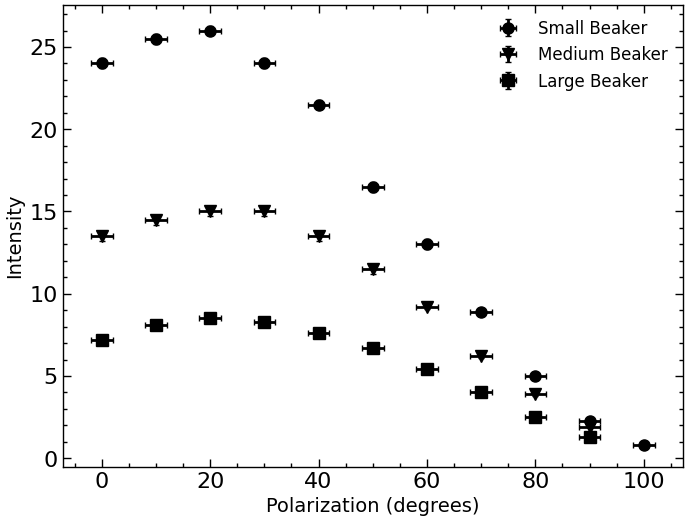

\begin{table}[H]
	\begin{center}
		\begin{tabular}{ccc}
			\toprule
			Polarization (degrees) & Intensity (arb. units) & Intensity Error (arb. units) \\
			\midrule
			100 & 0.80 & 0.03 \\
			90 & 2.25 & 0.03 \\
			80 & 5.00 & 0.10 \\
			70 & 8.90 & 0.10 \\
			60 & 13.00 & 0.30 \\
			50 & 16.50 & 0.30 \\
			40 & 21.50 & 0.30 \\
			30 & 24.00 & 0.30 \\
			20 & 26.00 & 0.30 \\
			10 & 25.50 & 0.30 \\
			0 & 24.00 & 0.30 \\
			90 & 1.90 & 0.03 \\
			80 & 3.90 & 0.10 \\
			70 & 6.20 & 0.10 \\
			60 & 9.20 & 0.10 \\
			50 & 11.50 & 0.30 \\
			40 & 13.50 & 0.30 \\
			30 & 15.00 & 0.30 \\
			20 & 15.00 & 0.30 \\
			10 & 14.50 & 0.30 \\
			0 & 13.50 & 0.30 \\
			90 & 1.30 & 0.03 \\
			80 & 2.50 & 0.03 \\
			70 & 4.00 & 0.10 \\
			60 & 5.40 & 0.10 \\
			50 & 6.70 & 0.10 \\
			40 & 7.60 & 0.10 \\
			30 & 8.30 & 0.10 \\
			20 & 8.50 & 0.10 \\
			10 & 8.10 & 0.10 \\
			0 & 7.20 & 0.10 \\
			\bottomrule
		\end{tabular}
	\end{center}
	\caption{Solution 1}
	\label{tab:solution1}
\end{table}


In [57]:
# Solution 1 (300.5 g of sugar, total volume of 1002 mL)

# Large beaker with solution 1
large_beaker_solution1_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution1_intensity = np.array([1.30, 2.50, 4.0, 5.40, 6.7, 7.6, 8.3, 8.5, 8.1, 7.2])

# Medium beaker with solution 1
medium_beaker_solution1_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution1_intensity = np.array([1.90, 3.9, 6.2, 9.2, 11.5, 13.5, 15.0, 15.0, 14.5, 13.5])

# Small beaker with solution 1
small_beaker_solution1_polarization = np.array([100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution1_intensity = np.array([0.8, 2.25, 5.0, 8.9, 13.0, 16.5, 21.5, 24.0, 26.0, 25.5, 24.0])

# Intensity error for solution 1
large_beaker_solution1_intensity_error = np.array([0.03, 0.03, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
medium_beaker_solution1_intensity_error = np.array([0.03, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
small_beaker_solution1_intensity_error = np.array([0.03, 0.03, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
small_beaker_solution1_polarization_error = np.full((len(small_beaker_solution1_polarization), ), 2)

# Plot the data
fig, ax = plt.subplots()
ax.set_prop_cycle(custom_marker_cycler)
ax.errorbar(small_beaker_solution1_polarization, small_beaker_solution1_intensity, xerr=small_beaker_solution1_polarization_error, yerr=small_beaker_solution1_intensity_error, markersize='8', c='k', ls='none', label='Small Beaker')
ax.errorbar(medium_beaker_solution1_polarization, medium_beaker_solution1_intensity, xerr=polarization_error_degrees, yerr=medium_beaker_solution1_intensity_error, markersize='8', c='k', ls='none', label='Medium Beaker')
ax.errorbar(large_beaker_solution1_polarization, large_beaker_solution1_intensity, xerr=polarization_error_degrees, yerr=large_beaker_solution1_intensity_error, markersize='8', c='k', ls='none', label='Large Beaker')
ax.set_xlabel('Polarization (degrees)', fontsize=14)
ax.set_ylabel('Intensity', fontsize=14)
# plt.title("Solution 1")
ax.legend(loc='best', fontsize='large')
plt.savefig('../figures/solution1.png')
plt.show()

# Turn data into a latex table

## Small beaker with solution 1 data

table_3 = Texttable()
table_3.set_deco(Texttable.HEADER)
table_3.set_cols_dtype(['t', 'f', 'f'])
table_3.set_cols_align(["c", "c", "c"])
table_3.set_precision(2)
table_3.add_rows([['Polarization (degrees)', 'Intensity (arb. units)', 'Intensity Error (arb. units)'],
                    [100, 0.8, 0.03],
                    [90, 2.25, 0.03],
                    [80, 5.0, 0.1],
                    [70, 8.9, 0.1],
                    [60, 13.0, 0.3],
                    [50, 16.5, 0.3],
                    [40, 21.5, 0.3],
                    [30, 24.0, 0.3],
                    [20, 26.0, 0.3],
                    [10, 25.5, 0.3],
                    [0, 24.0, 0.3],
                    [90, 1.90, 0.03],
                    [80, 3.9, 0.1],
                    [70, 6.2, 0.1],
                    [60, 9.2, 0.1],
                    [50, 11.5, 0.3],
                    [40, 13.5, 0.3],
                    [30, 15.0, 0.3],
                    [20, 15.0, 0.3],
                    [10, 14.5, 0.3],
                    [0, 13.5, 0.3],
                    [90, 1.30, 0.03],
                    [80, 2.50, 0.03],
                    [70, 4.0, 0.1],
                    [60, 5.40, 0.1],
                    [50, 6.7, 0.1],
                    [40, 7.6, 0.1],
                    [30, 8.3, 0.1],
                    [20, 8.5, 0.1],
                    [10, 8.1, 0.1],
                    [0, 7.2, 0.1]])
print(draw_latex(table_3, caption='Solution 1', label='tab:solution1', use_booktabs=True, position='H'))

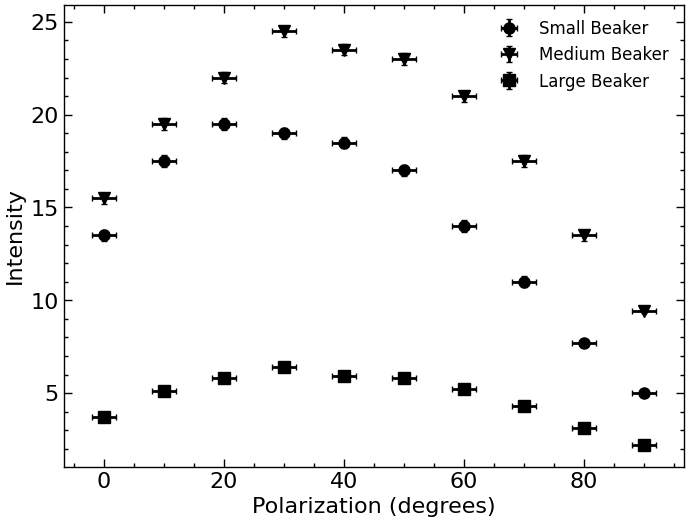

\begin{table}[H]
	\begin{center}
		\begin{tabular}{ccc}
			\toprule
			Polarization (degrees) & Intensity (arb. units) & Intensity Error (arb. units) \\
			\midrule
			90 & 5.00 & 0.10 \\
			80 & 7.70 & 0.10 \\
			70 & 11.00 & 0.30 \\
			60 & 14.00 & 0.30 \\
			50 & 17.00 & 0.30 \\
			40 & 18.50 & 0.30 \\
			30 & 19.00 & 0.30 \\
			20 & 19.50 & 0.30 \\
			10 & 17.50 & 0.30 \\
			0 & 13.50 & 0.30 \\
			90 & 9.40 & 0.10 \\
			80 & 13.50 & 0.30 \\
			70 & 17.50 & 0.30 \\
			60 & 21.00 & 0.30 \\
			50 & 23.00 & 0.30 \\
			40 & 23.50 & 0.30 \\
			30 & 24.50 & 0.30 \\
			20 & 22.00 & 0.30 \\
			10 & 19.50 & 0.30 \\
			0 & 15.50 & 0.30 \\
			90 & 2.20 & 0.03 \\
			80 & 3.10 & 0.10 \\
			70 & 4.30 & 0.10 \\
			60 & 5.20 & 0.10 \\
			50 & 5.80 & 0.10 \\
			40 & 5.90 & 0.10 \\
			30 & 6.40 & 0.10 \\
			20 & 5.80 & 0.10 \\
			10 & 5.10 & 0.10 \\
			0 & 3.70 & 0.10 \\
			\bottomrule
		\end{tabular}
	\end{center}
	\caption{Solution 2}
	\label{tab:solution2}
\end{table}


In [58]:
# Solution 2 (600.7 g of sugar, total volume of 1018 mL)

# Large beaker with solution 2
large_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution2_intensity = np.array([2.2, 3.1, 4.3, 5.2, 5.8, 5.9, 6.4, 5.8, 5.1, 3.7])

# Medium beaker with solution 2
medium_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution2_intensity = np.array([9.4, 13.5, 17.5, 21.0, 23.0, 23.5, 24.5, 22.0, 19.5, 15.5])

# Small beaker with solution 2
small_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution2_intensity = np.array([5.0, 7.7, 11.0, 14.0, 17.0, 18.5, 19.0, 19.5, 17.5, 13.5])

# Intensity error for solution 2
large_beaker_solution2_intensity_error = np.array([0.03, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
medium_beaker_solution2_intensity_error = np.array([0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
small_beaker_solution2_intensity_error = np.array([0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_solution2_polarization, medium_beaker_solution2_polarization, large_beaker_solution2_polarization, 
                                        small_beaker_solution2_intensity, medium_beaker_solution2_intensity, large_beaker_solution2_intensity, 
                                        polarization_error_degrees, small_beaker_solution2_intensity_error, medium_beaker_solution2_intensity_error, 
                                        large_beaker_solution2_intensity_error, None, 'solution2')

# Turn data into a latex table

## Small beaker with solution 2 table

table_4 = Texttable()
table_4.set_deco(Texttable.HEADER)
table_4.set_cols_dtype(['t', 'f', 'f'])
table_4.set_cols_align(["c", "c", "c"])
table_4.set_precision(2)
table_4.add_rows([['Polarization (degrees)', 'Intensity (arb. units)', 'Intensity Error (arb. units)'],
                    [90, 5.0, 0.1],
                    [80, 7.7, 0.1],
                    [70, 11.0, 0.3],
                    [60, 14.0, 0.3],
                    [50, 17.0, 0.3],
                    [40, 18.5, 0.3],
                    [30, 19.0, 0.3],
                    [20, 19.5, 0.3],
                    [10, 17.5, 0.3],
                    [0, 13.5, 0.3],
                    [90, 9.4, 0.1],
                    [80, 13.5, 0.3],
                    [70, 17.5, 0.3],
                    [60, 21.0, 0.3],
                    [50, 23.0, 0.3],
                    [40, 23.5, 0.3],
                    [30, 24.5, 0.3],
                    [20, 22.0, 0.3],
                    [10, 19.5, 0.3],
                    [0, 15.5, 0.3],
                    [90, 2.2, 0.03],
                    [80, 3.1, 0.1],
                    [70, 4.3, 0.1],
                    [60, 5.2, 0.1],
                    [50, 5.8, 0.1],
                    [40, 5.9, 0.1],
                    [30, 6.4, 0.1],
                    [20, 5.8, 0.1],
                    [10, 5.1, 0.1],
                    [0, 3.7, 0.1]])
print(draw_latex(table_4, caption='Solution 2', label='tab:solution2', use_booktabs=True, position='H'))

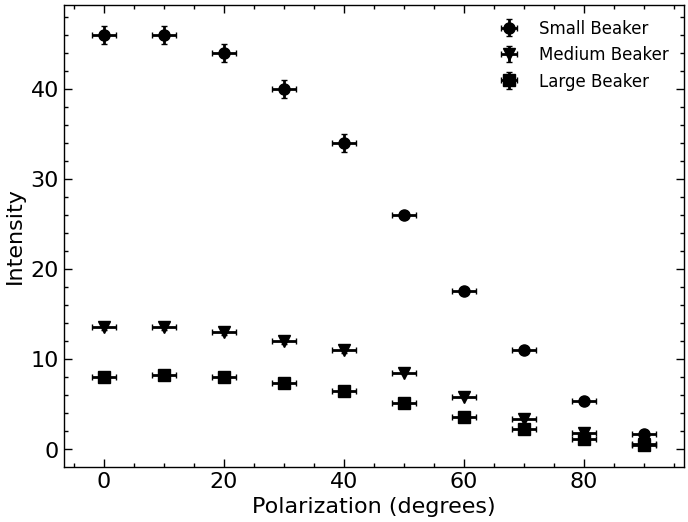

\begin{table}[H]
	\begin{center}
		\begin{tabular}{ccc}
			\toprule
			Polarization (degrees) & Intensity (arb. units) & Intensity Error (arb. units) \\
			\midrule
			90 & 1.70 & 0.03 \\
			80 & 5.30 & 0.10 \\
			70 & 11.00 & 0.30 \\
			60 & 17.50 & 0.30 \\
			50 & 26.00 & 0.30 \\
			40 & 34.00 & 1.00 \\
			30 & 40.00 & 1.00 \\
			20 & 44.00 & 1.00 \\
			10 & 46.00 & 1.00 \\
			0 & 46.00 & 1.00 \\
			90 & 0.58 & 0.01 \\
			80 & 1.75 & 0.03 \\
			70 & 3.40 & 0.10 \\
			60 & 5.80 & 0.10 \\
			50 & 8.40 & 0.10 \\
			40 & 11.00 & 0.30 \\
			30 & 12.00 & 0.30 \\
			20 & 13.00 & 0.30 \\
			10 & 13.50 & 0.30 \\
			0 & 13.50 & 0.30 \\
			90 & 0.41 & 0.01 \\
			80 & 1.10 & 0.03 \\
			70 & 2.25 & 0.03 \\
			60 & 3.60 & 0.10 \\
			50 & 5.10 & 0.10 \\
			40 & 6.40 & 0.10 \\
			30 & 7.30 & 0.10 \\
			20 & 8.00 & 0.10 \\
			10 & 8.20 & 0.10 \\
			0 & 8.00 & 0.10 \\
			\bottomrule
		\end{tabular}
	\end{center}
	\caption{Solution 3}
	\label{tab:solution3}
\end{table}


In [59]:
# Solution 3 (150.6 g of sugar, total volume of 1000 mL)

# Large beaker with solution 3
large_beaker_solution3_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution3_intensity = np.array([0.405, 1.10, 2.25, 3.6, 5.1, 6.4, 7.3, 8.0, 8.2, 8.0])

# Medium beaker with solution 3
medium_beaker_solution3_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution3_intensity = np.array([0.58, 1.75, 3.4, 5.8, 8.4, 11.0, 12.0, 13.0, 13.5, 13.5])

# Small beaker with solution 3
small_beaker_solution3_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution3_intensity = np.array([1.70, 5.3, 11.0, 17.5, 26.0, 34, 40, 44, 46, 46])

# Intensity error for solution 3
large_beaker_solution3_intensity_error = np.array([0.01, 0.03, 0.03, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
medium_beaker_solution3_intensity_error = np.array([0.01, 0.03, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3])
small_beaker_solution3_intensity_error = np.array([0.03, 0.1, 0.3, 0.3, 0.3, 1, 1, 1, 1, 1])

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_solution3_polarization, medium_beaker_solution3_polarization, large_beaker_solution3_polarization, 
                                        small_beaker_solution3_intensity, medium_beaker_solution3_intensity, large_beaker_solution3_intensity, 
                                        polarization_error_degrees, small_beaker_solution3_intensity_error, medium_beaker_solution3_intensity_error, 
                                        large_beaker_solution3_intensity_error, None, 'solution3')

# Turn data into a latex table

## Small beaker with solution 3 table

table_5 = Texttable()
table_5.set_deco(Texttable.HEADER)
table_5.set_cols_dtype(['t', 'f', 'f'])
table_5.set_cols_align(["c", "c", "c"])
table_5.set_precision(2)
table_5.add_rows([['Polarization (degrees)', 'Intensity (arb. units)', 'Intensity Error (arb. units)'],
                    [90, 1.70, 0.03],
                    [80, 5.3, 0.1],
                    [70, 11.0, 0.3],
                    [60, 17.5, 0.3],
                    [50, 26.0, 0.3],
                    [40, 34, 1],
                    [30, 40, 1],
                    [20, 44, 1],
                    [10, 46, 1],
                    [0, 46, 1],
                    [90, 0.58, 0.01],
                    [80, 1.75, 0.03],
                    [70, 3.4, 0.1],
                    [60, 5.8, 0.1],
                    [50, 8.4, 0.1],
                    [40, 11.0, 0.3],
                    [30, 12.0, 0.3],
                    [20, 13.0, 0.3],
                    [10, 13.5, 0.3],
                    [0, 13.5, 0.3],
                    [90, 0.405, 0.01],
                    [80, 1.10, 0.03],
                    [70, 2.25, 0.03],
                    [60, 3.6, 0.1],
                    [50, 5.1, 0.1],
                    [40, 6.4, 0.1],
                    [30, 7.3, 0.1],
                    [20, 8.0, 0.1],
                    [10, 8.2, 0.1],
                    [0, 8.0, 0.1]])
print(draw_latex(table_5, caption='Solution 3', label='tab:solution3', use_booktabs=True, position='H'))

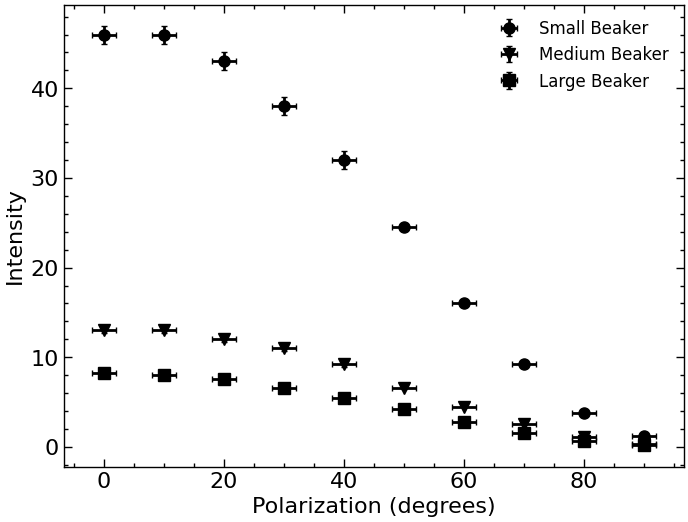

\begin{table}[H]
	\begin{center}
		\begin{tabular}{ccc}
			\toprule
			Polarization (degrees) & Intensity (arb. units) & Intensity Error (arb. units) \\
			\midrule
			90 & 1.20 & 0.03 \\
			80 & 3.80 & 0.10 \\
			70 & 9.20 & 0.10 \\
			60 & 16.00 & 0.30 \\
			50 & 24.50 & 0.30 \\
			40 & 32.00 & 1.00 \\
			30 & 38.00 & 1.00 \\
			20 & 43.00 & 1.00 \\
			10 & 46.00 & 1.00 \\
			0 & 46.00 & 1.00 \\
			90 & 0.29 & 0.01 \\
			80 & 1.05 & 0.03 \\
			70 & 2.55 & 0.10 \\
			60 & 4.50 & 0.10 \\
			50 & 6.60 & 0.10 \\
			40 & 9.20 & 0.30 \\
			30 & 11.00 & 0.30 \\
			20 & 12.00 & 0.30 \\
			10 & 13.00 & 0.30 \\
			0 & 13.00 & 0.30 \\
			90 & 0.15 & 0.01 \\
			80 & 0.61 & 0.01 \\
			70 & 1.55 & 0.03 \\
			60 & 2.80 & 0.03 \\
			50 & 4.20 & 0.10 \\
			40 & 5.50 & 0.10 \\
			30 & 6.60 & 0.10 \\
			20 & 7.60 & 0.10 \\
			10 & 8.00 & 0.10 \\
			0 & 8.20 & 0.10 \\
			\bottomrule
		\end{tabular}
	\end{center}
	\caption{Solution 4}
	\label{tab:solution4}
\end{table}


In [60]:
# Solution 4 (75.3 g of sugar, total volume of 1000 mL)

# Large beaker with solution 4
large_beaker_solution4_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution4_intensity = np.array([0.15, 0.61, 1.55, 2.80, 4.2, 5.5, 6.6, 7.6, 8.0, 8.2])

# Medium beaker with solution 4
medium_beaker_solution4_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution4_intensity = np.array([0.29, 1.05, 2.55, 4.5, 6.6, 9.2, 11.0, 12.0, 13.0, 13.0])

# Small beaker with solution 4
small_beaker_solution4_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution4_intensity = np.array([1.20, 3.8, 9.2, 16.0, 24.5, 32, 38, 43, 46, 46])

# Intensity error for solution 4
large_beaker_solution4_intensity_error = np.array([0.01, 0.01, 0.03, 0.03, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
medium_beaker_solution4_intensity_error = np.array([0.01, 0.03, 0.03, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3])
small_beaker_solution4_intensity_error = np.array([0.03, 0.1, 0.1, 0.3, 0.3, 1, 1, 1, 1, 1])

# Plot the data
polarization_v_intensity_by_beaker_size(small_beaker_solution4_polarization, medium_beaker_solution4_polarization, large_beaker_solution4_polarization, 
                                        small_beaker_solution4_intensity, medium_beaker_solution4_intensity, large_beaker_solution4_intensity,
                                        polarization_error_degrees, small_beaker_solution4_intensity_error, medium_beaker_solution4_intensity_error, 
                                        large_beaker_solution4_intensity_error, None, 'solution4')

# Turn data into a latex table

## Small beaker with solution 4 table

table_6 = Texttable()
table_6.set_deco(Texttable.HEADER)
table_6.set_cols_dtype(['t', 'f', 'f'])
table_6.set_cols_align(["c", "c", "c"])
table_6.set_precision(2)
table_6.add_rows([['Polarization (degrees)', 'Intensity (arb. units)', 'Intensity Error (arb. units)'],
                    [90, 1.20, 0.03],
                    [80, 3.8, 0.1],
                    [70, 9.2, 0.1],
                    [60, 16.0, 0.3],
                    [50, 24.5, 0.3],
                    [40, 32, 1],
                    [30, 38, 1],
                    [20, 43, 1],
                    [10, 46, 1],
                    [0, 46, 1],
                    [90, 0.29, 0.01],
                    [80, 1.05, 0.03],
                    [70, 2.55, 0.1],
                    [60, 4.5, 0.1],
                    [50, 6.6, 0.1],
                    [40, 9.2, 0.3],
                    [30, 11.0, 0.3],
                    [20, 12.0, 0.3],
                    [10, 13.0, 0.3],
                    [0, 13.0, 0.3],
                    [90, 0.15, 0.01],
                    [80, 0.61, 0.01],
                    [70, 1.55, 0.03],
                    [60, 2.80, 0.03],
                    [50, 4.2, 0.1],
                    [40, 5.5, 0.1],
                    [30, 6.6, 0.1],
                    [20, 7.6, 0.1],
                    [10, 8.0, 0.1],
                    [0, 8.2, 0.1]])
print(draw_latex(table_6, caption='Solution 4', label='tab:solution4', use_booktabs=True, position='H'))

In [61]:
# Define function to plot polarization versus intensity with all solutions on same graph

def polarization_v_intensity_by_solution(large_beaker_intensity, large_beaker_polarization, large_beaker_intensity_error, large_beaker_with_water_intensity, large_beaker_with_water_polarization, large_beaker_with_water_intensity_error, large_beaker_solution1_intensity, large_beaker_solution1_polarization, large_beaker_solution1_intensity_error, large_beaker_solution2_intensity, large_beaker_solution2_polarization, large_beaker_solution2_intensity_error, large_beaker_solution3_intensity, large_beaker_solution3_polarization, large_beaker_solution3_intensity_error, large_beaker_solution4_intensity, large_beaker_solution4_polarization, large_beaker_solution4_intensity_error, polarization_error, title, save_name):
    fig, ax = plt.subplots()
    ax.set_prop_cycle(custom_marker_cycler)
    ax.errorbar(large_beaker_polarization, large_beaker_intensity, xerr=polarization_error, yerr=large_beaker_intensity_error, markersize='10', c='k', ls='none', label='No water')
    ax.errorbar(large_beaker_with_water_polarization, large_beaker_with_water_intensity, xerr=polarization_error, yerr=large_beaker_with_water_intensity_error, markersize='10', c='k', ls='none', label='Water')
    ax.errorbar(large_beaker_solution1_polarization, large_beaker_solution1_intensity, xerr=polarization_error, yerr=large_beaker_solution1_intensity_error, markersize='10', c='k', ls='none', label='Solution 1')
    ax.errorbar(large_beaker_solution2_polarization, large_beaker_solution2_intensity, xerr=polarization_error, yerr=large_beaker_solution2_intensity_error, markersize='10', c='k', ls='none', label='Solution 2')
    ax.errorbar(large_beaker_solution3_polarization, large_beaker_solution3_intensity, xerr=polarization_error, yerr=large_beaker_solution3_intensity_error, markersize='10', c='k', ls='none', label='Solution 3')
    ax.errorbar(large_beaker_solution4_polarization, large_beaker_solution4_intensity, xerr=polarization_error, yerr=large_beaker_solution4_intensity_error, markersize='10', c='k', ls='none', label='Solution 4')
    ax.set_xlabel('Polarization (degrees)')
    ax.set_ylabel('Intensity (arb. units)')
    ax.set_title(title)
    ax.legend(loc='best', fontsize='large')
    plt.savefig('../figures/' + save_name + '.png')
    plt.show()

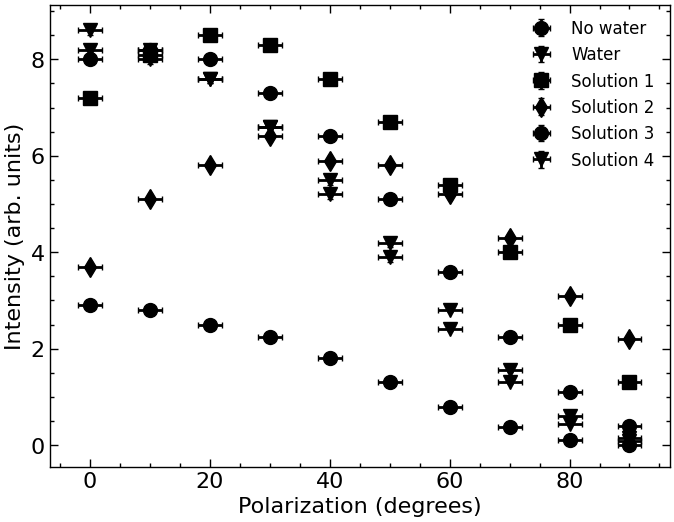

In [62]:
# Large beaker path length plot (108.8 mm)

polarization_v_intensity_by_solution(large_beaker_intensity, large_beaker_polarization, large_beaker_intensity_error, large_beaker_with_water_intensity, large_beaker_with_water_polarization, large_beaker_with_water_intensity_error, large_beaker_solution1_intensity, large_beaker_solution1_polarization, large_beaker_solution1_intensity_error, large_beaker_solution2_intensity, large_beaker_solution2_polarization, large_beaker_solution2_intensity_error, large_beaker_solution3_intensity, large_beaker_solution3_polarization, large_beaker_solution3_intensity_error, large_beaker_solution4_intensity, large_beaker_solution4_polarization, large_beaker_solution4_intensity_error, polarization_error_degrees, None, 'large_beaker_path_length')

# plt.scatter(large_beaker_polarization, large_beaker_intensity, label='No Water')
# plt.scatter(large_beaker_with_water_polarization, large_beaker_with_water_intensity, label='Water')
# plt.scatter(large_beaker_solution1_polarization, large_beaker_solution1_intensity, label='Solution 1')
# plt.scatter(large_beaker_solution2_polarization, large_beaker_solution2_intensity, label='Solution 2')
# plt.xlabel('Polarization Angle (degrees)')
# plt.ylabel('Intensity (arb. units)')
# plt.title("Large Beaker")
# plt.legend(loc='best')
# plt.show()

In [63]:
# Define function to plot

def plot_pol_v_int(polarization, intensity, pol_fit, int_fit, title):
    plt.scatter(polarization, intensity, label='Data')
    plt.plot(pol_fit, int_fit, c='k', label='Fit')
    plt.xlabel('Polarization Angle (radians)')
    plt.ylabel('Intensity (arb. units)')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Define function for cosine fit
def cos(B, x):
    return B[0]*np.cos(B[1]*x + B[2]) + B[3]

# Define function to propagate errors through cosine fit
def fit_error_propagation_cos(x, y, y_err):
    cos_model = odr.Model(cos)
    data = odr.RealData(x, y, sy=y_err)
    odr_fit = odr.ODR(data, cos_model, beta0=[1, 1, 1, 1])
    odr_fit_output = odr_fit.run()
    return odr_fit_output

(10,)
(10,)
(10,)
Beta: [ 4.29795678  1.515673   -0.07493406  4.31420288]
Beta Std Error: [0.67680816 0.56633885 0.50575833 0.70132222]
Beta Covariance: [[ 0.97003866 -0.49658559 -0.0883988  -0.84307262]
 [-0.49658559  0.67922017 -0.31194461  0.65722492]
 [-0.0883988  -0.31194461  0.54168143 -0.14014673]
 [-0.84307262  0.65722492 -0.14014673  1.04158105]]
Residual Variance: 0.47221756017783595
Inverse Condition #: 0.1377140943889897
Reason(s) for Halting:
  Iteration limit reached


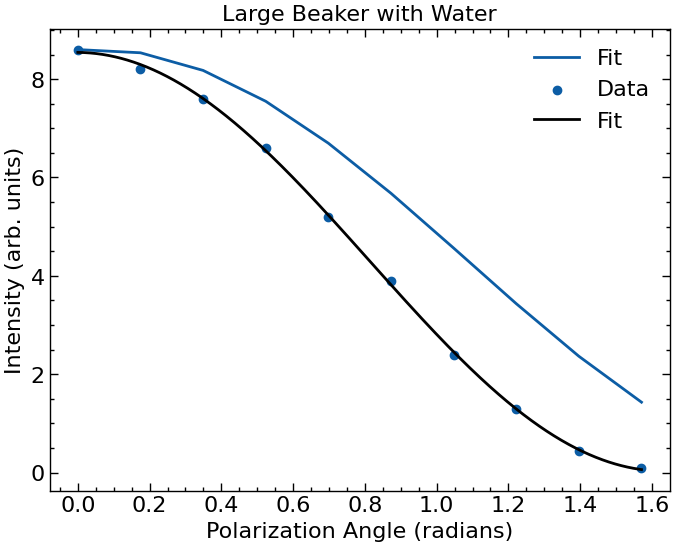

In [64]:
# Attempt to fit with cos function rather than sin for better phase shift

print(large_beaker_with_water_polarization.shape)
print(large_beaker_with_water_intensity.shape)
print(large_beaker_with_water_intensity_error.shape)

# Large beaker with water curve fitting
large_beaker_water_odr_fit = fit_error_propagation_cos(large_beaker_with_water_polarization*np.pi/180, large_beaker_with_water_intensity, large_beaker_with_water_intensity_error*np.pi/180)

plt.plot(large_beaker_with_water_polarization*np.pi/180, cos(large_beaker_water_odr_fit.beta, large_beaker_with_water_polarization*np.pi/180), label='Fit')

def cos(x, A, B, C, D):
    return A*np.cos(B*x - C) + D

# Print results
large_beaker_water_odr_fit.pprint()

# Large beaker with water curve fiting

large_with_water_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_with_water_polarization, large_beaker_with_water_intensity, p0=(8, 0.1, 0.1, 0))

x = np.linspace(np.min(large_beaker_with_water_polarization), np.max(large_beaker_with_water_polarization), 1000)

plot_pol_v_int(large_beaker_with_water_polarization*np.pi/180, large_beaker_with_water_intensity, x*np.pi/180, cos(x, *large_with_water_optimal_vals[0]), 'Large Beaker with Water')

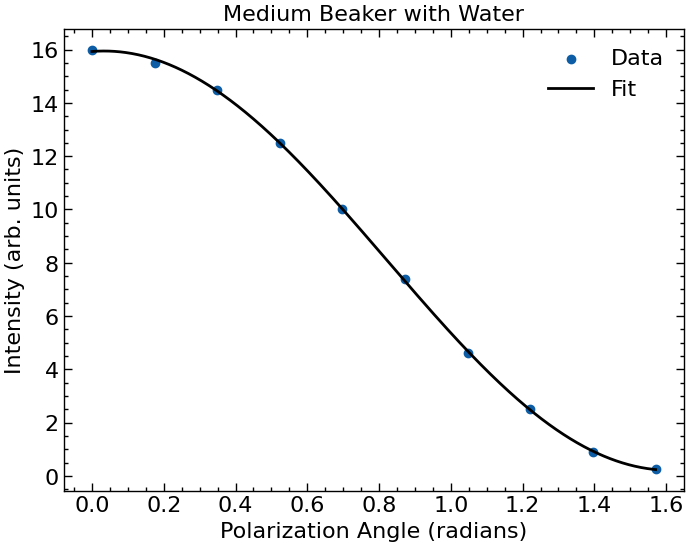

In [65]:
# Medium beaker with water curve fiting

medium_with_water_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_with_water_polarization, medium_beaker_with_water_intensity, p0=(16, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_with_water_polarization), np.max(medium_beaker_with_water_polarization), 1000)

plot_pol_v_int(medium_beaker_with_water_polarization*np.pi/180, medium_beaker_with_water_intensity, x*np.pi/180, cos(x, *medium_with_water_optimal_vals[0]), 'Medium Beaker with Water')

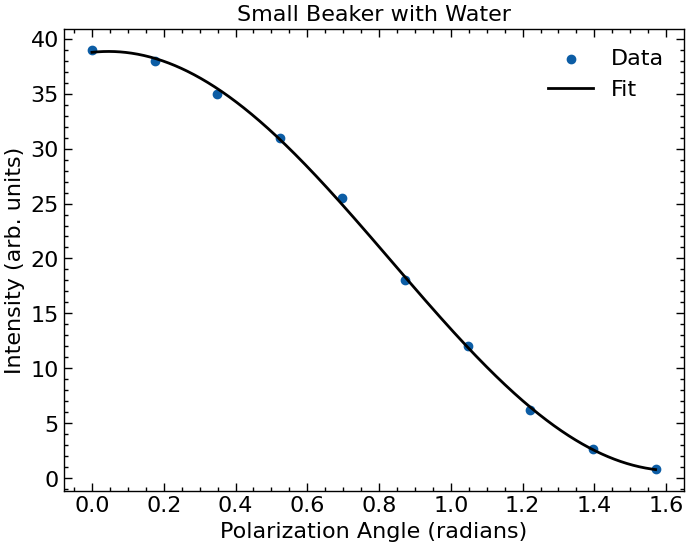

In [66]:
# Small beaker with water curve fiting

small_with_water_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_with_water_polarization, small_beaker_with_water_intensity, p0=(16, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_with_water_polarization), np.max(small_beaker_with_water_polarization), 1000)

plot_pol_v_int(small_beaker_with_water_polarization*np.pi/180, small_beaker_with_water_intensity, x*np.pi/180, cos(x, *small_with_water_optimal_vals[0]), 'Small Beaker with Water')

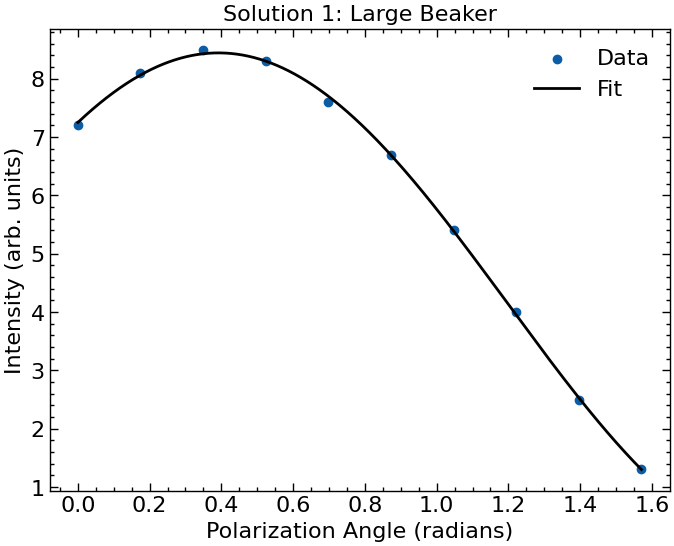

In [67]:
# Solution 1 large beaker curve fitting

large_sln_01_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution1_polarization, large_beaker_solution1_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution1_polarization), np.max(large_beaker_solution1_polarization), 1000)

plot_pol_v_int(large_beaker_solution1_polarization*np.pi/180, large_beaker_solution1_intensity, x*np.pi/180, cos(x, *large_sln_01_optimal_vals[0]), 'Solution 1: Large Beaker')

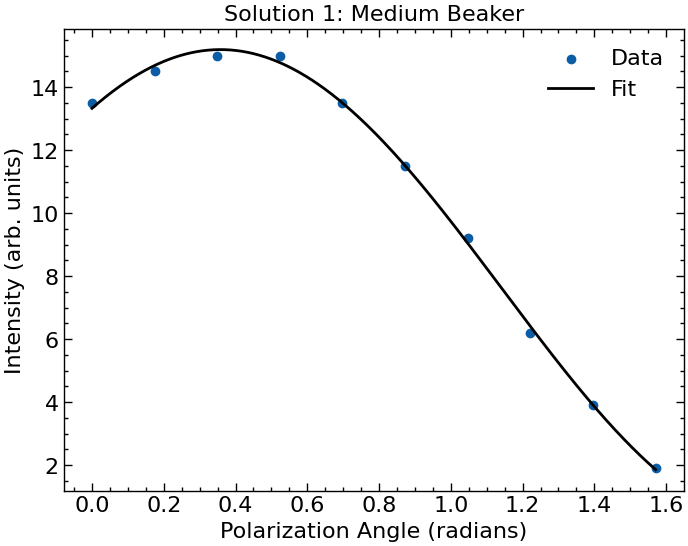

In [68]:
# Solution 1 medium beaker curve fitting

medium_sln_01_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution1_polarization, medium_beaker_solution1_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution1_polarization), np.max(medium_beaker_solution1_polarization), 1000)

plot_pol_v_int(medium_beaker_solution1_polarization*np.pi/180, medium_beaker_solution1_intensity, x*np.pi/180, cos(x, *medium_sln_01_optimal_vals[0]), 'Solution 1: Medium Beaker')

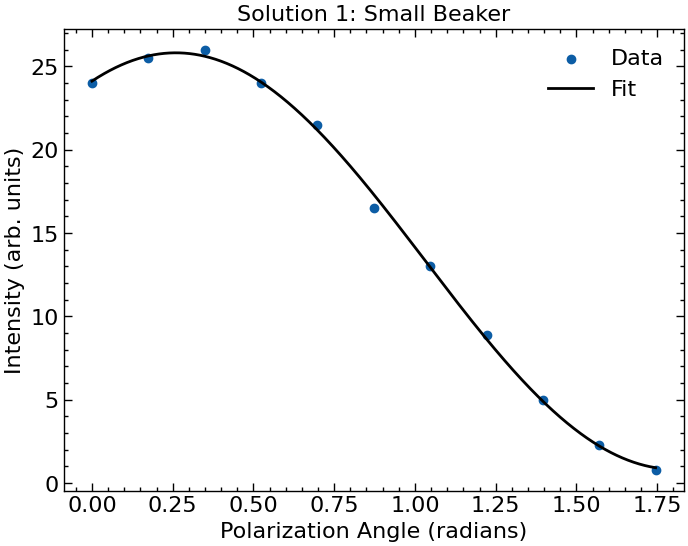

In [69]:
# Solution 1 small beaker curve fitting

small_sln_01_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution1_polarization, small_beaker_solution1_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution1_polarization), np.max(small_beaker_solution1_polarization), 1000)

plot_pol_v_int(small_beaker_solution1_polarization*np.pi/180, small_beaker_solution1_intensity, x*np.pi/180, cos(x, *small_sln_01_optimal_vals[0]), 'Solution 1: Small Beaker')

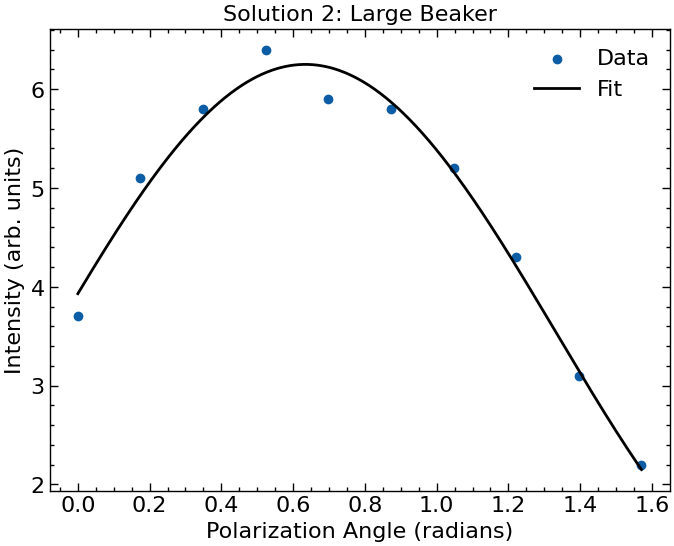

In [70]:
# Solution 2 large beaker curve fitting

large_sln_02_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution2_polarization, large_beaker_solution2_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution2_polarization), np.max(large_beaker_solution2_polarization), 1000)

plot_pol_v_int(large_beaker_solution2_polarization*np.pi/180, large_beaker_solution2_intensity, x*np.pi/180, cos(x, *large_sln_02_optimal_vals[0]), 'Solution 2: Large Beaker')

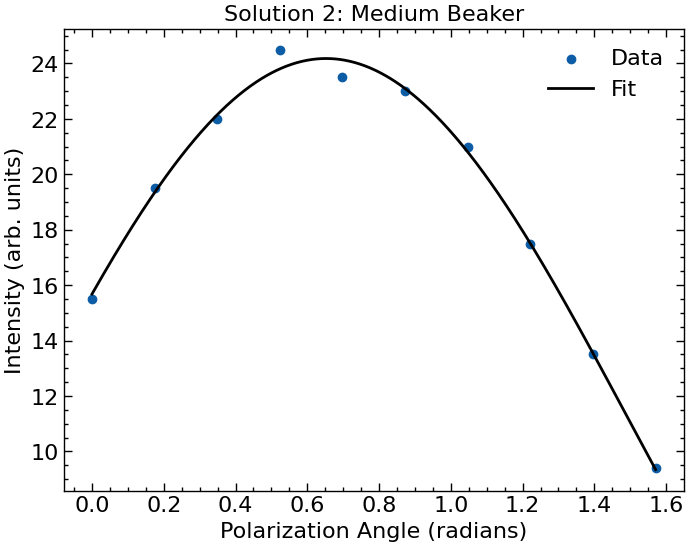

In [71]:
# Solution 2 medium beaker curve fitting

medium_sln_02_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution2_polarization, medium_beaker_solution2_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution2_polarization), np.max(medium_beaker_solution2_polarization), 1000)

plot_pol_v_int(medium_beaker_solution2_polarization*np.pi/180, medium_beaker_solution2_intensity, x*np.pi/180, cos(x, *medium_sln_02_optimal_vals[0]), 'Solution 2: Medium Beaker')

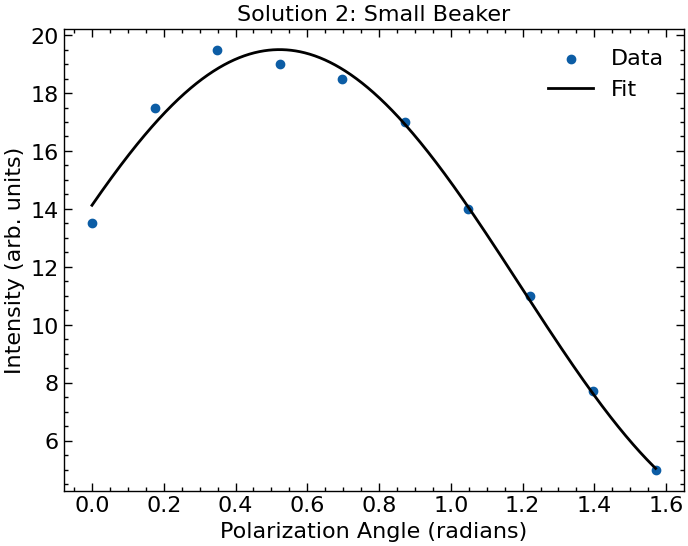

In [72]:
# Solution 2 small beaker curve fitting

small_sln_02_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution2_polarization, small_beaker_solution2_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution2_polarization), np.max(small_beaker_solution2_polarization), 1000)

plot_pol_v_int(small_beaker_solution2_polarization*np.pi/180, small_beaker_solution2_intensity, x*np.pi/180, cos(x, *small_sln_02_optimal_vals[0]), 'Solution 2: Small Beaker')

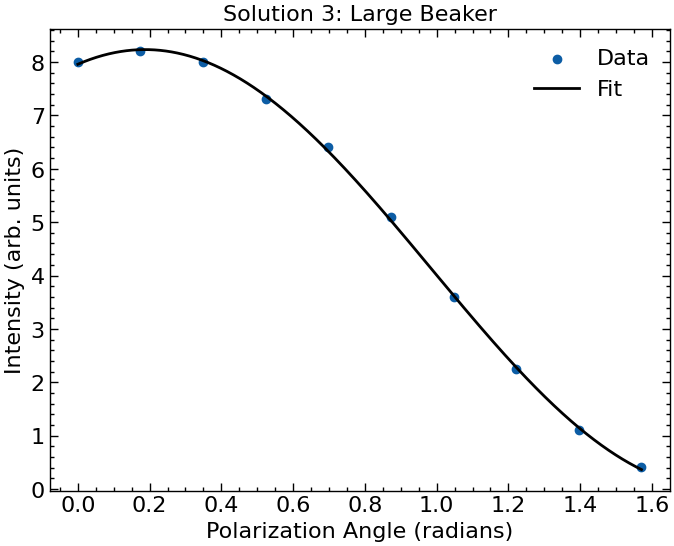

In [73]:
# Solution 3 large beaker curve fitting

large_sln_03_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution3_polarization, large_beaker_solution3_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution3_polarization), np.max(large_beaker_solution3_polarization), 1000)

plot_pol_v_int(large_beaker_solution3_polarization*np.pi/180, large_beaker_solution3_intensity, x*np.pi/180, cos(x, *large_sln_03_optimal_vals[0]), 'Solution 3: Large Beaker')

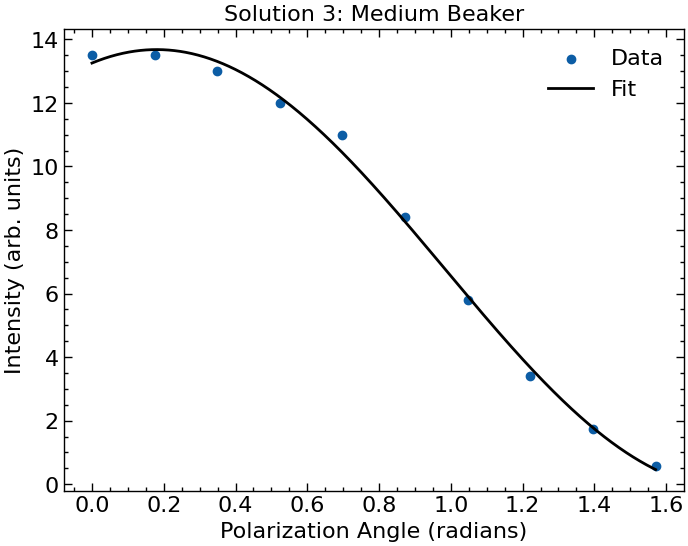

In [74]:
# Solution 3 medium beaker curve fitting

medium_sln_03_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution3_polarization, medium_beaker_solution3_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution3_polarization), np.max(medium_beaker_solution3_polarization), 1000)

plot_pol_v_int(medium_beaker_solution3_polarization*np.pi/180, medium_beaker_solution3_intensity, x*np.pi/180, cos(x, *medium_sln_03_optimal_vals[0]), 'Solution 3: Medium Beaker')

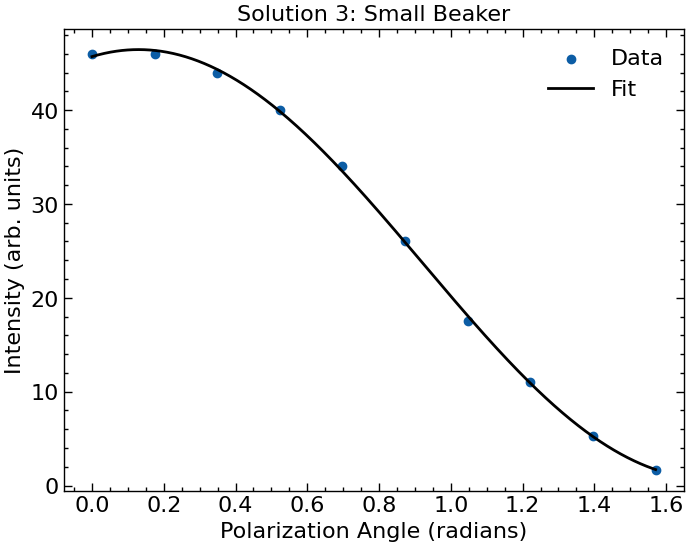

In [75]:
# Solution 3 small beaker curve fitting

small_sln_03_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution3_polarization, small_beaker_solution3_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution3_polarization), np.max(small_beaker_solution3_polarization), 1000)

plot_pol_v_int(small_beaker_solution3_polarization*np.pi/180, small_beaker_solution3_intensity, x*np.pi/180, cos(x, *small_sln_03_optimal_vals[0]), 'Solution 3: Small Beaker')

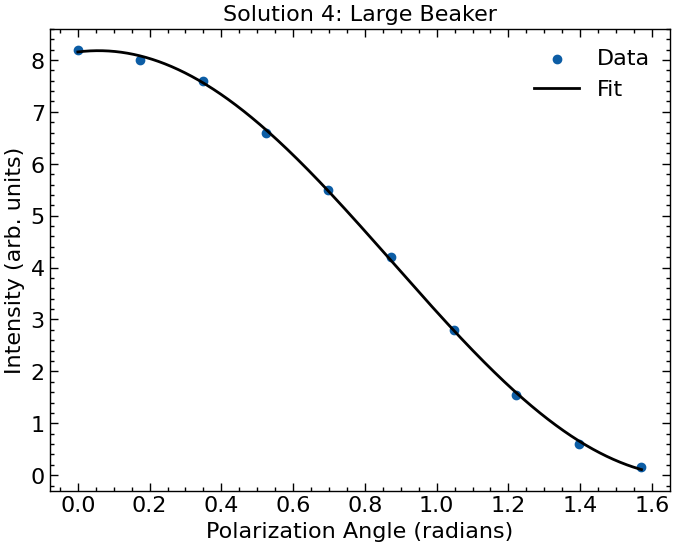

In [76]:
# Solution 4 large beaker curve fitting

large_sln_04_optimal_vals = sp.optimize.curve_fit(cos, large_beaker_solution4_polarization, large_beaker_solution4_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(large_beaker_solution4_polarization), np.max(large_beaker_solution4_polarization), 1000)

plot_pol_v_int(large_beaker_solution4_polarization*np.pi/180, large_beaker_solution4_intensity, x*np.pi/180, cos(x, *large_sln_04_optimal_vals[0]), 'Solution 4: Large Beaker')

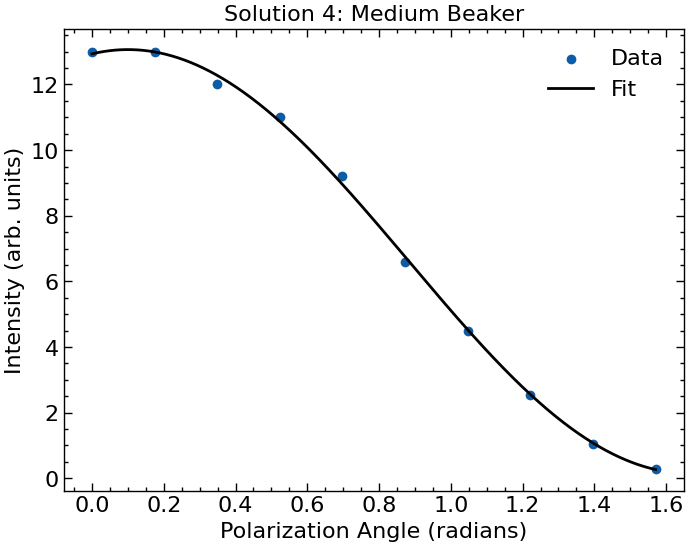

In [77]:
# Solution 4 medium beaker curve fitting

medium_sln_04_optimal_vals = sp.optimize.curve_fit(cos, medium_beaker_solution4_polarization, medium_beaker_solution4_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(medium_beaker_solution4_polarization), np.max(medium_beaker_solution4_polarization), 1000)

plot_pol_v_int(medium_beaker_solution4_polarization*np.pi/180, medium_beaker_solution4_intensity, x*np.pi/180, cos(x, *medium_sln_04_optimal_vals[0]), 'Solution 4: Medium Beaker')

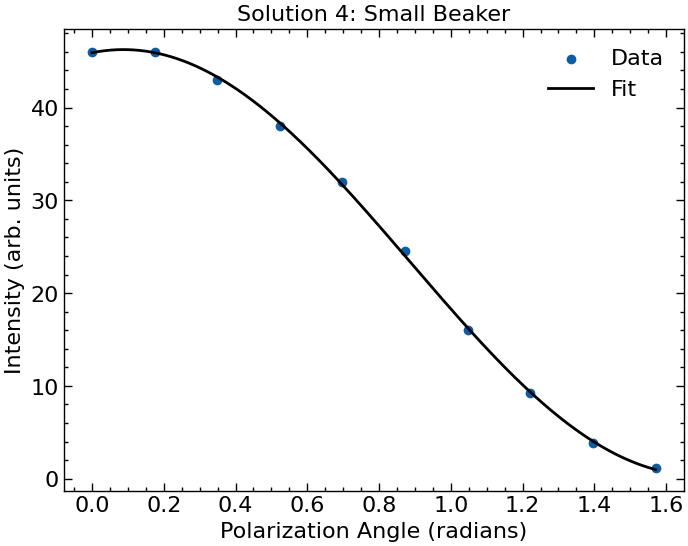

In [98]:
# Solution 4 small beaker curve fitting

small_sln_04_optimal_vals = sp.optimize.curve_fit(cos, small_beaker_solution4_polarization, small_beaker_solution4_intensity, p0=(8, 0.01, 0.1, 0))

x = np.linspace(np.min(small_beaker_solution4_polarization), np.max(small_beaker_solution4_polarization), 1000)

# plot_pol_v_int(small_beaker_solution4_polarization*np.pi/180, small_beaker_solution4_intensity, x*np.pi/180, cos(x, *small_sln_04_optimal_vals[0]), 'Solution 4: Small Beaker')
plt.scatter(small_beaker_solution4_polarization*np.pi/180, small_beaker_solution4_intensity, label='Data')
plt.plot(x*np.pi/180, cos(x, *small_sln_04_optimal_vals[0]), c='k', label='Fit')
plt.xlabel('Polarization Angle (radians)')
plt.ylabel('Intensity (arb. units)')
plt.title('Solution 4: Small Beaker')
plt.legend(loc='best')
plt.savefig('../figures/solution4_small_beaker_fit.png')
plt.show()

In [79]:
# Plot the phase shifts verus solution concentration

def plot(phase_shifts, concentrations):
    plt.scatter(concentrations, phase_shifts)
    plt.xlabel('Concentration (g/mL)')
    plt.ylabel('Phase Shift (radians)')
large_with_water_phase_shift = large_with_water_optimal_vals[0][2]
medium_with_water_phase_shift = medium_with_water_optimal_vals[0][2]
small_with_water_phase_shift = small_with_water_optimal_vals[0][2]
large_sln_01_phase_shift = large_sln_01_optimal_vals[0][2]
medium_sln_01_phase_shift = medium_sln_01_optimal_vals[0][2]
small_sln_01_phase_shift = small_sln_01_optimal_vals[0][2]
large_sln_02_phase_shift = large_sln_02_optimal_vals[0][2]
medium_sln_02_phase_shift = medium_sln_02_optimal_vals[0][2]
small_sln_02_phase_shift = small_sln_02_optimal_vals[0][2]
large_sln_03_phase_shift = large_sln_03_optimal_vals[0][2]
medium_sln_03_phase_shift = medium_sln_03_optimal_vals[0][2]
small_sln_03_phase_shift = small_sln_03_optimal_vals[0][2]
large_sln_04_phase_shift = large_sln_04_optimal_vals[0][2]
medium_sln_04_phase_shift = medium_sln_04_optimal_vals[0][2]
small_sln_04_phase_shift = small_sln_04_optimal_vals[0][2]

print (large_sln_01_optimal_vals[0][2])

solutions = ['Solution 1', 'Solution 2']
phase_shifts = [large_with_water_phase_shift, large_sln_01_phase_shift, medium_sln_01_phase_shift, small_sln_01_phase_shift, large_sln_02_phase_shift, medium_sln_02_phase_shift, small_sln_02_phase_shift, large_sln_03_phase_shift, medium_sln_03_phase_shift, small_sln_03_phase_shift, large_sln_04_phase_shift, medium_sln_04_phase_shift, small_sln_04_phase_shift]
concentrations = [0, 300.5/1002, 600.7/1018, 150.6/1000, 75.3/1000]

0.7647688406391362


In [80]:
# Create array of ufloated intensitites
large_with_water_intensity_ufloat = unumpy.uarray(large_beaker_with_water_intensity, large_beaker_with_water_intensity_error)
large_with_water_intensity_ufloat

array([0.09+/-0.01, 0.43+/-0.01, 1.3+/-0.03, 2.4+/-0.03, 3.9+/-0.1,
       5.2+/-0.1, 6.6+/-0.1, 7.6+/-0.1, 8.2+/-0.1, 8.6+/-0.1],
      dtype=object)

In [81]:
no_solution_mass = ufloat(0, 0.1)
no_solution_volume = ufloat(1000, 2)
no_solution_concentration = no_solution_mass / no_solution_volume

In [82]:
# Error propagation for solution 1 concentration calculation

# Define the mass measurements with uncertainties (measured in grams)
solution_1_mass_measurement_1 = ufloat(100.1, 0.1)
solution_1_mass_measurement_2 = ufloat(100.0, 0.1)
solution_1_mass_measurement_3 = ufloat(100.4, 0.1)

# Define the volume measurements with uncertainties (measured in milliliters)
solution_1_volume_measurement_1 = ufloat(338, 2)
solution_1_volume_measurement_2 = ufloat(414, 2)
solution_1_volume_measurement_3 = ufloat(250, 2)

# Total mass of sugar for solution 1
solution_1_total_mass = solution_1_mass_measurement_1 + solution_1_mass_measurement_2 + solution_1_mass_measurement_3

# Total volume of solution 1
solution_1_total_volume = solution_1_volume_measurement_1 + solution_1_volume_measurement_2 + solution_1_volume_measurement_3

# Calculate the concentration of solution 1 (in grams per milliliter)
solution_1_concentration = solution_1_total_mass / solution_1_total_volume

# Print the concentration of solution 1
print(solution_1_concentration)

0.2999+/-0.0011


In [83]:
# Error propagation for solution 2 concentration calculation

# Define the mass measurements with uncertainties (measured in grams)
solution_2_mass_measurement_1 = ufloat(200.0, 0.1) 
solution_2_mass_measurement_2 = ufloat(200.4, 0.1)
solution_2_mass_measurement_3 = ufloat(200.3, 0.1)

# Define the volume measurements with uncertainties (measured in milliliters)
solution_2_volume_measurement_1 = ufloat(400, 2)
solution_2_volume_measurement_2 = ufloat(360, 2)
solution_2_volume_measurement_3 = ufloat(220, 2)
solution_2_rinse_1_volume_measurement = ufloat(23.0, 0.2)
solution_2_rinse_2_volume_measurement = ufloat(15.0, 0.2)

# Total mass of sugar for solution 2
solution_2_total_mass = solution_2_mass_measurement_1 + solution_2_mass_measurement_2 + solution_2_mass_measurement_3

# Total volume of solution 2
solution_2_total_volume = solution_2_volume_measurement_1 + solution_2_volume_measurement_2 + solution_2_volume_measurement_3 + solution_2_rinse_1_volume_measurement + solution_2_rinse_2_volume_measurement

# Calculate the concentration of solution 2 (in grams per milliliter)
solution_2_concentration = solution_2_total_mass / solution_2_total_volume

# Print the concentration of solution 2
print(solution_2_concentration)

0.5901+/-0.0020


In [84]:
# Error propagation for solution 3 concentration calculation

# Define the mass measurements with uncertainties (measured in grams)
solution_3_mass_measurement_1 = ufloat(150.6, 0.1)

# Define the volume measurements with uncertainties (measured in milliliters)
solution_3_volume_measurement_1 = ufloat(492, 2)
solution_3_volume_measurement_2 = ufloat(508, 2)

# Total mass of sugar for solution 3
total_mass_solution_3 = solution_3_mass_measurement_1

# Total volume of solution 3
total_volume_solution_3 = solution_3_volume_measurement_1 + solution_3_volume_measurement_2

# Calculate the concentration of solution 3 (in grams per milliliter)
solution_3_concentration = total_mass_solution_3 / total_volume_solution_3

# Print the concentration of solution 3
print(solution_3_concentration)

0.1506+/-0.0004


In [85]:
# Error propagation for solution 4 concentration calculation

# Define the mass measurements with uncertainties (measured in grams)
solution_4_mass_measurement_1 = ufloat(75.3, 0.1)

# Define the volume measurements with uncertainties (measured in milliliters)
solution_4_volume_measurement_1 = ufloat(500, 2)
solution_4_volume_measurement_2 = ufloat(500, 2)

# Total mass of sugar for solution 4
total_mass_solution_4 = solution_4_mass_measurement_1

# Total volume of solution 4
total_volume_solution_4 = solution_4_volume_measurement_1 + solution_4_volume_measurement_2

# Calculate the concentration of solution 4 (in grams per milliliter)
solution_4_concentration = total_mass_solution_4 / total_volume_solution_4

# Print the concentration of solution 4
print(solution_4_concentration)

0.07530+/-0.00024


In [86]:
# Create table for mass, mass error, volume, volume error, concentration, and concentration error

table_7 = Texttable()
table_7.set_deco(Texttable.HEADER)
table_7.set_cols_dtype(['t', 'f', 'f', 'f', 'f', 'f', 'f'])
table_7.set_cols_align(["c", "c", "c", "c", "c", "c", "c"])
table_7.set_precision(2)
table_7.add_rows([['Solution', 'Mass (g)', 'Mass Error (g)', 'Volume (mL)', 'Volume Error (mL)', 'Concentration (g/mL)', 'Concentration Error (g/mL)'],
                    ['1', 100.2, 0.1, 1000, 2, 0.100, 0.001],
                    ['2', 200.2, 0.1, 1003, 2, 0.200, 0.001],
                    ['3', 150.6, 0.1, 1000, 2, 0.151, 0.001],
                    ['4', 75.3, 0.1, 1000, 2, 0.075, 0.001]])
print(draw_latex(table_7, caption='Concentration of Solutions', label='tab:solution_concentration', use_booktabs=True, position='H'))

\begin{table}[H]
	\begin{center}
		\begin{tabular}{ccccccc}
			\toprule
			Solution & Mass (g) & Mass Error (g) & Volume (mL) & Volume Error (mL) & Concentration (g/mL) & Concentration Error (g/mL) \\
			\midrule
			1 & 100.20 & 0.10 & 1000.00 & 2.00 & 0.10 & 0.00 \\
			2 & 200.20 & 0.10 & 1003.00 & 2.00 & 0.20 & 0.00 \\
			3 & 150.60 & 0.10 & 1000.00 & 2.00 & 0.15 & 0.00 \\
			4 & 75.30 & 0.10 & 1000.00 & 2.00 & 0.07 & 0.00 \\
			\bottomrule
		\end{tabular}
	\end{center}
	\caption{Concentration of Solutions}
	\label{tab:solution_concentration}
\end{table}


In [87]:
concentrations = [ufloat(0, 0.1), solution_1_concentration, solution_2_concentration, solution_3_concentration, solution_4_concentration]
concentration_values = [0, solution_1_concentration.nominal_value, solution_2_concentration.nominal_value, solution_3_concentration.nominal_value, solution_4_concentration.nominal_value]
concentration_errors = [no_solution_concentration.std_dev, solution_1_concentration.std_dev, solution_2_concentration.std_dev, solution_3_concentration.std_dev, solution_4_concentration.std_dev]

# Create unumpy arrays for concentration and phase shift
no_beaker_no_water_error_arr = unumpy.uarray(no_beaker_intensity, no_beaker_intensity_error)
small_beaker_no_water_error_arr = unumpy.uarray(small_beaker_intensity, small_beaker_intensity_error)
medium_beaker_no_water_error_arr = unumpy.uarray(medium_beaker_intensity, medium_beaker_intensity_error)
large_beaker_no_water_error_arr = unumpy.uarray(large_beaker_intensity, large_beaker_intensity_error)
small_beaker_with_water_error_arr = unumpy.uarray(small_beaker_with_water_intensity, small_beaker_with_water_intensity_error)
medium_beaker_with_water_error_arr = unumpy.uarray(medium_beaker_with_water_intensity, medium_beaker_with_water_intensity_error)
large_beaker_with_water_error_arr = unumpy.uarray(large_beaker_with_water_intensity, large_beaker_with_water_intensity_error)
small_beaker_solution1_error_arr = unumpy.uarray(small_beaker_solution1_intensity, small_beaker_solution1_intensity_error)
medium_beaker_solution1_error_arr = unumpy.uarray(medium_beaker_solution1_intensity, medium_beaker_solution1_intensity_error)
large_beaker_solution1_error_arr = unumpy.uarray(large_beaker_solution1_intensity, large_beaker_solution1_intensity_error)
small_beaker_solution2_error_arr = unumpy.uarray(small_beaker_solution2_intensity, small_beaker_solution2_intensity_error)
medium_beaker_solution2_error_arr = unumpy.uarray(medium_beaker_solution2_intensity, medium_beaker_solution2_intensity_error)
large_beaker_solution2_error_arr = unumpy.uarray(large_beaker_solution2_intensity, large_beaker_solution2_intensity_error)
small_beaker_solution3_error_arr = unumpy.uarray(small_beaker_solution3_intensity, small_beaker_solution3_intensity_error)
medium_beaker_solution3_error_arr = unumpy.uarray(medium_beaker_solution3_intensity, medium_beaker_solution3_intensity_error)
large_beaker_solution3_error_arr = unumpy.uarray(large_beaker_solution3_intensity, large_beaker_solution3_intensity_error)
small_beaker_solution4_error_arr = unumpy.uarray(small_beaker_solution4_intensity, small_beaker_solution4_intensity_error)
medium_beaker_solution4_error_arr = unumpy.uarray(medium_beaker_solution4_intensity, medium_beaker_solution4_intensity_error)
large_beaker_solution4_error_arr = unumpy.uarray(large_beaker_solution4_intensity, large_beaker_solution4_intensity_error)




# Define function to fit
def linear(p, x):
    m, c = p
    return m*x + c

# Define function to propagate errors through linear fit
def fit_error_propagation(x, y, x_err):
    linear_model = odr.Model(linear)
    data = odr.RealData(x, y, sx=x_err)
    odr_fit = odr.ODR(data, linear_model, beta0=[0., 1.])
    odr_fit_output = odr_fit.run()
    return odr_fit_output

def calc_r2_from_odr(out):
    SS_res = np.sum(out.eps**2)
    SS_tot = np.sum((out.y - np.mean(out.y))**2)

    return 1 - (SS_res/SS_tot)

Beta: [ 2.4802184  -0.02211028]
Beta Std Error: [0.09362    0.02859556]
Beta Covariance: [[ 4.59892235 -1.02635986]
 [-1.02635986  0.4290581 ]]
Residual Variance: 0.0019058170148478146
Inverse Condition #: 0.02080615422764912
Reason(s) for Halting:
  Sum of squares convergence


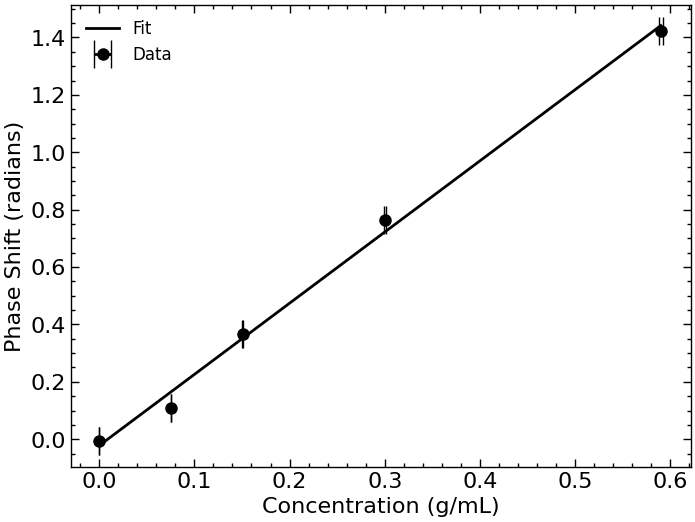

In [88]:
# Phase shift versus concentration for large beaker
# Use scipy.odr to propagate errors through fitting

large_beaker_phase_shifts = [large_with_water_phase_shift, large_sln_01_phase_shift, large_sln_02_phase_shift, large_sln_03_phase_shift, large_sln_04_phase_shift]

# # Use scipy.odr to propagate errors through fitting
large_beaker_odr_fit = fit_error_propagation(concentration_values, large_beaker_phase_shifts, concentration_errors)

# # Print the fit parameters
large_beaker_odr_fit.pprint()

plt.errorbar(concentration_values, large_beaker_phase_shifts, xerr=concentration_errors, label='Data', c='k', markersize=8, fmt='o', ls='none', capsize=10)
plt.xlabel('Concentration (g/mL)')
plt.ylabel('Phase Shift (radians)')
# plt.title('Large Beaker')

# Use numpy polyfit function to fit a line to the data
fit = np.polyfit(concentration_values, large_beaker_phase_shifts, 1)
concentration_fit = np.linspace(np.min(concentration_values), np.max(concentration_values), 1000)

def phase_shift_fit(x, m, b):
    return m*x + b

# plt.plot(concentration_fit, phase_shift_fit(concentration_fit, *fit), c='k', label='Fit')
plt.plot(concentration_fit, linear(large_beaker_odr_fit.beta, concentration_fit), c='k', label='Fit')
plt.legend(loc='best', fontsize='large')
plt.savefig('../figures/large_beaker_phase_shifts.png')
plt.show()

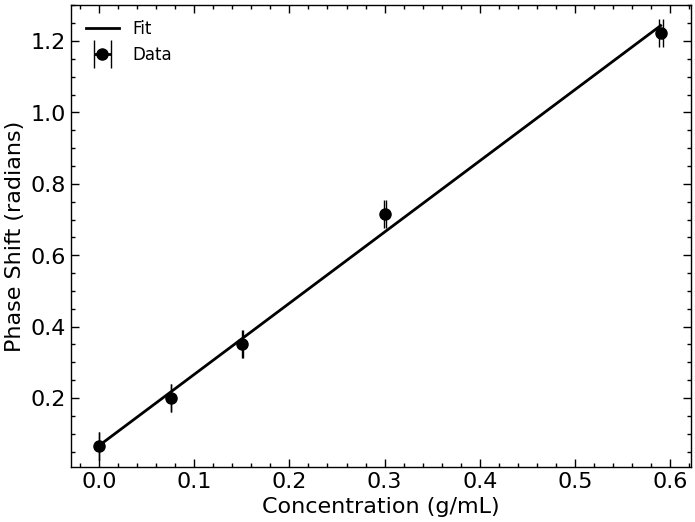

In [89]:
# Phase shift versus concentration for medium beaker

medium_beaker_phase_shifts = [medium_with_water_phase_shift, medium_sln_01_phase_shift, medium_sln_02_phase_shift, medium_sln_03_phase_shift, medium_sln_04_phase_shift]

plt.errorbar(concentration_values, medium_beaker_phase_shifts, xerr=concentration_errors, label='Data', c='k', markersize=8, fmt='o', ls='none', capsize=10)
plt.xlabel('Concentration (g/mL)')
plt.ylabel('Phase Shift (radians)')
# plt.title('Medium Beaker')

# Use numpy polyfit function to fit a line to the data
fit = np.polyfit(concentration_values, medium_beaker_phase_shifts, 1)
concentration_fit = np.linspace(np.min(concentration_values), np.max(concentration_values), 1000)

def phase_shift_fit(x, m, b):
    return m*x + b

plt.plot(concentration_fit, phase_shift_fit(concentration_fit, *fit), c='k', label='Fit')
plt.legend(loc='best', fontsize='large')
plt.savefig('../figures/medium_beaker_phase_shifts.png')
plt.show()

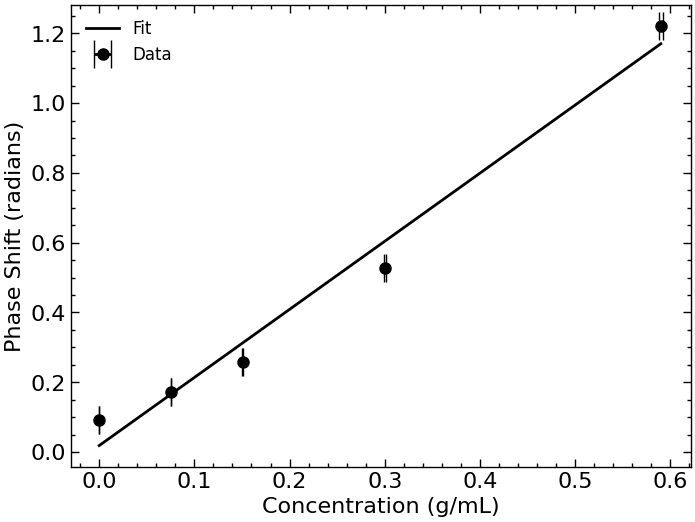

In [90]:
# Phase shift versus concentration for small beaker

small_beaker_phase_shifts = [small_with_water_phase_shift, small_sln_01_phase_shift, small_sln_02_phase_shift, small_sln_03_phase_shift, small_sln_04_phase_shift]

plt.errorbar(concentration_values, small_beaker_phase_shifts, xerr=concentration_errors, label='Data', c='k', markersize=8, fmt='o', ls='none', capsize=10)
plt.xlabel('Concentration (g/mL)')
plt.ylabel('Phase Shift (radians)')
# plt.title('Small Beaker')

# Use numpy polyfit function to fit a line to the data
fit = np.polyfit(concentration_values, small_beaker_phase_shifts, 1)
concentration_fit = np.linspace(np.min(concentration_values), np.max(concentration_values), 1000)

def phase_shift_fit(x, m, b):
    return m*x + b

plt.plot(concentration_fit, phase_shift_fit(concentration_fit, *fit), c='k', label='Fit')
plt.legend(loc='best', fontsize='large')
plt.savefig('../figures/small_beaker_phase_shifts.png')
plt.show()

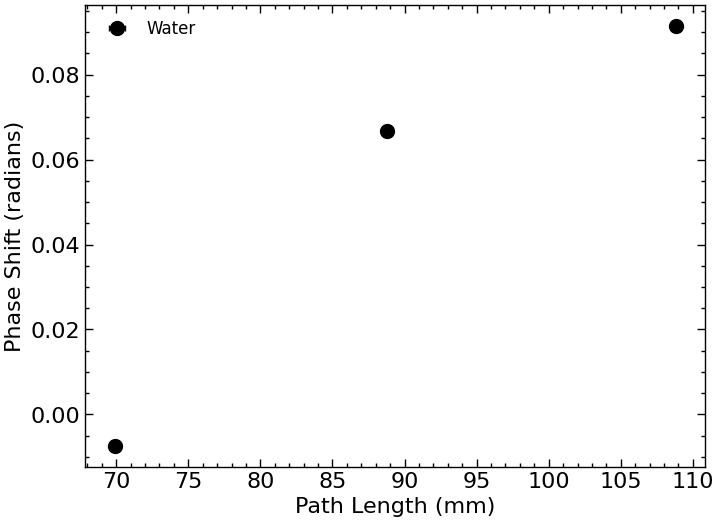

In [91]:
# Graphs for path length (mm) versus phase shift (radians)

large_beaker_diameter = ufloat(108.8, 0.1)
medium_beaker_diameter = ufloat(88.8, 0.1)
small_beaker_diameter = ufloat(69.9, 0.1)

diameter = [small_beaker_diameter, medium_beaker_diameter, large_beaker_diameter]
diameter_values = [small_beaker_diameter.nominal_value, medium_beaker_diameter.nominal_value, large_beaker_diameter.nominal_value]
diameter_errors = [small_beaker_diameter.std_dev, medium_beaker_diameter.std_dev, large_beaker_diameter.std_dev]

# Water

plt.errorbar(diameter_values, [large_with_water_phase_shift, medium_with_water_phase_shift, small_with_water_phase_shift], xerr=diameter_errors, label='Water', c='k', markersize=10, fmt='o', ls='none')
plt.xlabel('Path Length (mm)')
plt.ylabel('Phase Shift (radians)')
plt.legend(loc='best', fontsize='large')
# plt.savefig('../figures/water_path_length_phase_shifts.png')
plt.show()

In [92]:
# Create table for path lengths of beakers

table_8 = Texttable()
table_8.set_deco(Texttable.HEADER)
table_8.set_cols_dtype(['t', 'f'])
table_8.set_cols_align(["c", "c"])
table_8.set_precision(2)
table_8.add_rows([['Beaker', 'Diameter $\pm 0.1$ (mm)'],
                    ['Small', 69.9],
                    ['Medium', 88.8],
                    ['Large', 108.8]])
print(draw_latex(table_8, caption='Beaker Diameters', label='tab:beaker_diameters', use_booktabs=True, position='H'))

\begin{table}[H]
	\begin{center}
		\begin{tabular}{cc}
			\toprule
			Beaker & Diameter $\pm 0.1$ (mm) \\
			\midrule
			Small & 69.90 \\
			Medium & 88.80 \\
			Large & 108.80 \\
			\bottomrule
		\end{tabular}
	\end{center}
	\caption{Beaker Diameters}
	\label{tab:beaker_diameters}
\end{table}


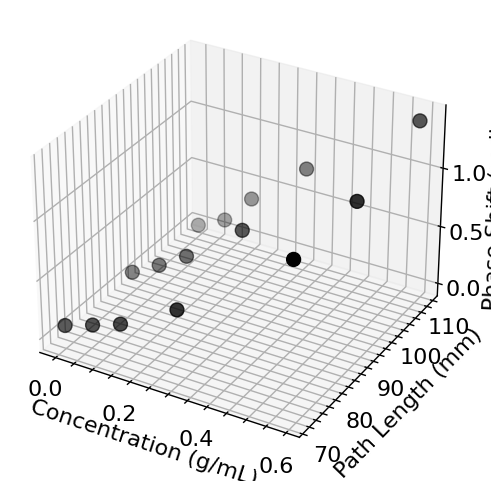

In [93]:
# Attempt to combine all data into one graph (phase shift versus concentration/path length)

phase_shifts = [small_beaker_phase_shifts, medium_beaker_phase_shifts, large_beaker_phase_shifts]

# Plot phase shift versus concentration/path length

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create meshgrid for concentration and path length
concentration_mesh, diameter_mesh = np.meshgrid(concentration_values, diameter_values)

# Plot the data
ax.scatter(concentration_mesh, diameter_mesh, phase_shifts, c='k', marker='o', s=100)

# Set the labels
ax.set_xlabel('Concentration (g/mL)')
ax.set_ylabel('Path Length (mm)')
ax.set_zlabel('Phase Shift (radians)')
plt.show()

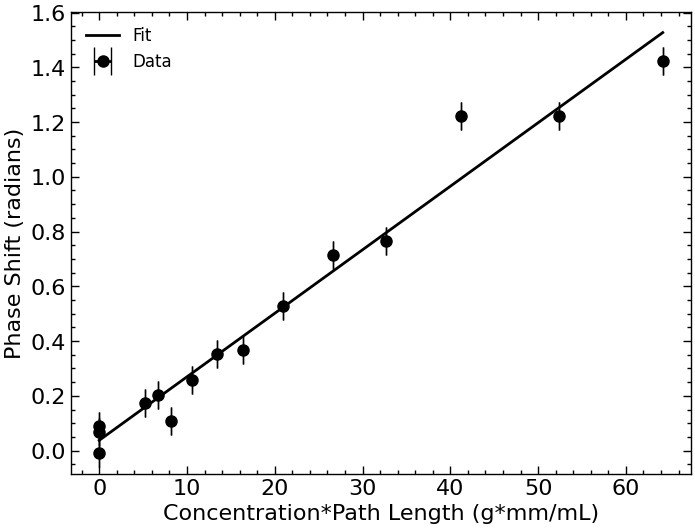

0.9702786745943969
[0.02319774 0.03743408]


In [95]:
concentration_times_diameter = np.empty(shape=[len(diameter_values),len(concentration_values)])
concentration_times_diameter_error = np.empty(shape=(len(diameter_values), len(concentration_values)))

for i in range(len(diameter_values)):
    for j in range(len(concentration_values)):
        concentration_times_diameter[i, j] = concentration_values[j]*diameter_values[i]

for i in range(len(diameter_values)):
    for j in range(len(concentration_values)):
        concentration_times_diameter_error[i, j] = concentrations[j].std_dev*diameter[i].std_dev

# Fit data
concentration_times_diameter_fit = np.polyfit(concentration_times_diameter.flatten(), np.array(phase_shifts).flatten(), 1)
concentration_times_diameter_fit_filler_values = np.linspace(np.min(concentration_times_diameter), np.max(concentration_times_diameter), 1000)

# Plot phase shift versus concentration*path length

fig, ax = plt.subplots()
plt.errorbar(concentration_times_diameter.flatten(), np.array(phase_shifts).flatten(), xerr=concentration_times_diameter_error.flatten(), c='k', ls='none', fmt='o', markersize=8, label='Data', capsize=10)
plt.plot(concentration_times_diameter_fit_filler_values, linear(concentration_times_diameter_fit, concentration_times_diameter_fit_filler_values), c='k', label='Fit')
ax.set_xlabel('Concentration*Path Length (g*mm/mL)')
ax.set_ylabel('Phase Shift (radians)')
ax.legend(loc='best', fontsize='large')
plt.savefig('../figures/concentration_times_diameter_phase_shifts.png')
plt.show()

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(concentration_times_diameter.flatten(), np.array(phase_shifts).flatten())
print(r_value**2)

print(concentration_times_diameter_fit)